In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib inline

datapath = Path("../data/").resolve()
data = pd.read_pickle(datapath / "flicker_test_logs.pkl")
stats = pd.read_csv(datapath / "flicker_test_stats.csv")

stats["target_interval"] = 1 / stats["target_f"]
stats["pct_err_f"] = 100 * (stats["mean_f_old"] - stats["target_f"]) / stats["target_f"]
stats["pct_err_interval"] = (
    100 * (2 * stats["mean_interval"] - stats["target_interval"]) / stats["target_interval"]
)
targ_f = stats["target_f"]
targ_int = stats["target_interval"]

display(stats)

,state_number,trial_number,flicker_freq,duration,trial_start,trial_end,target_f,count_interval,mean_interval,std_interval,...,mean_f,std_f,min_f,25%_f,50%_f,75%_f,max_f,target_interval,pct_err_f,pct_err_interval
0,0,NaN,2,2.0,0.030136,3.010744,2,12.0,0.247947,0.007830,...,2.018553,0.068906,1.962680,1.989257,1.998210,2.023174,2.226819,0.500000,0.827962,-0.821163
1,1,NaN,3,2.0,3.037580,6.018150,3,18.0,0.165310,0.006309,...,3.029303,0.130228,2.911039,2.974625,2.996836,3.033745,3.519763,0.333333,0.820528,-0.813850
2,2,NaN,4,2.0,6.044455,9.026189,4,24.0,0.124043,0.005436,...,4.039480,0.205844,3.844004,3.954743,3.998891,4.067221,4.927288,0.250000,0.771581,-0.765673
3,3,NaN,5,2.0,9.048075,12.033454,5,30.0,0.099383,0.003822,...,5.039343,0.224500,4.813427,4.950119,4.983683,5.050100,6.117420,0.200000,0.620446,-0.616620
4,4,NaN,6,2.0,12.055852,15.038109,6,35.0,0.082829,0.003675,...,6.049768,0.308653,5.666885,5.967730,6.011552,6.041590,7.548811,0.166667,0.608993,-0.605306
5,5,NaN,7,2.0,15.062179,18.042347,7,41.0,0.070976,0.004219,...,7.074006,0.513013,6.491357,6.810792,7.022048,7.134846,9.784219,0.142857,0.637398,-0.633361
6,6,NaN,8,2.0,18.062200,21.047523,8,47.0,0.062163,0.003523,...,8.073353,0.546273,7.456021,7.871376,7.995944,8.188742,11.038161,0.125000,0.542660,-0.539731
7,7,NaN,9,2.0,21.068735,24.055231,9,54.0,0.055226,0.003026,...,9.081599,0.522654,8.122052,8.793383,9.044012,9.368069,11.187660,0.111111,0.596156,-0.592623
8,8,NaN,10,2.0,24.075407,27.063708,10,60.0,0.049736,0.003130,...,10.102127,0.808138,9.001159,9.751237,10.005733,10.293220,15.256601,0.100000,0.531591,-0.528780
9,9,NaN,11,2.0,27.084031,30.071879,11,66.0,0.045197,0.003155,...,11.125615,0.933639,9.822218,10.683055,10.943879,11.239525,16.597676,0.090909,0.569218,-0.565997


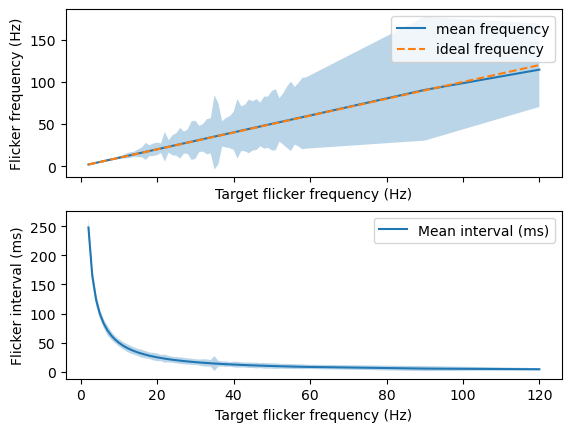

In [2]:
%matplotlib inline

fig, ax = plt.subplots(2, 1, sharex=True)
# ax[0].plot(targ_f, stats["mean_f"], label="mean frequency")
ax[0].plot(targ_f, stats["mean_f_old"], label="mean frequency")
ax[0].fill_between(
    targ_f, stats["mean_f"] - 2 * stats["std_f"], stats["mean_f"] + 2 * stats["std_f"], alpha=0.3
)
ax[0].plot(targ_f, targ_f, "--", label="ideal frequency")
ax[0].set_xlabel("Target flicker frequency (Hz)")
ax[0].set_ylabel("Flicker frequency (Hz)")
ax[0].legend()
ax[1].plot(targ_f, stats["mean_interval"] * 1000, label="Mean interval (ms)")
ax[1].fill_between(
    targ_f,
    (stats["mean_interval"] - 2 * stats["std_interval"]) * 1000,
    (stats["mean_interval"] + 2 * stats["std_interval"]) * 1000,
    alpha=0.3,
)
ax[1].set_xlabel("Target flicker frequency (Hz)")
ax[1].set_ylabel("Flicker interval (ms)")
plt.legend()

(-2.0, 2.0)

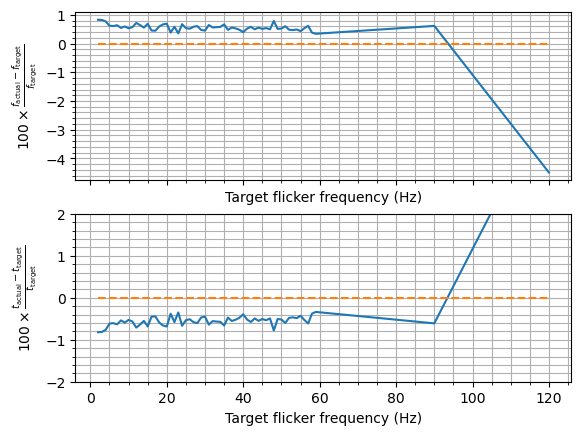

In [3]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].minorticks_on()
ax[1].minorticks_on()
ax[0].grid(visible=True, which="both")
ax[1].grid(visible=True, which="both")
ax[0].plot(targ_f, stats["pct_err_f"], label="Mean frequency error (%)")
ax[0].plot(targ_f, np.zeros_like(targ_f), "--")
ax[0].set_xlabel("Target flicker frequency (Hz)")
ax[0].set_ylabel(r"$100 \times\frac{f_{\text{actual}} - f_{\text{target}}}{f_{\text{target}}}$")
ax[1].plot(targ_f, stats["pct_err_interval"], label="Mean interval error (%)")
ax[1].plot(targ_f, np.zeros_like(targ_f), "--")
ax[1].set_xlabel("Target flicker frequency (Hz)")
ax[1].set_ylabel(r"$100 \times \frac{t_{\text{actual}} - t_{\text{target}}}{t_{\text{target}}}$")
ax[1].set_ylim([-2, 2])

In [4]:
from pathlib import Path

from mne.io import read_raw_fif

datapath = Path("../data/test_2_raw.fif").resolve()
raw = read_raw_fif(datapath)

Opening raw data file C:\Users\gerce\Documents\Projects\language-intermodulation\data\test_2_raw.fif...
Isotrak not found
    Range : 834000 ... 1855999 =    166.800 ...   371.200 secs
Ready.
Opening raw data file C:\Users\gerce\Documents\Projects\language-intermodulation\data\test_2_raw.fif...
Isotrak not found
    Range : 834000 ... 1855999 =    166.800 ...   371.200 secs
Ready.


In [5]:
raw.ch_names

['MISC010', 'STI101', 'SYS201']

Hardware start time: 9.923
Software start time: 3.037580400000479
Time offset: 6.885419599999521


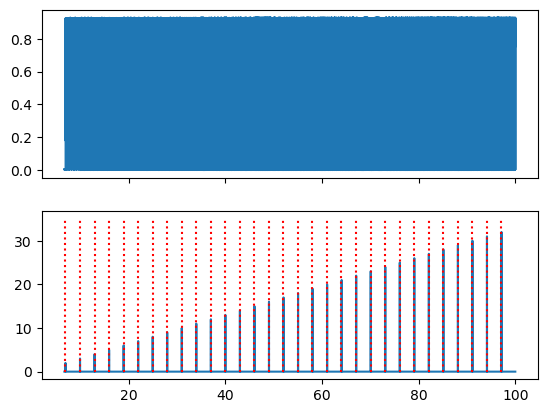

In [6]:
tmin, tmax = (6.7, 100.0)
d, t = raw.get_data(picks=["MISC010", "STI101"], tmin=tmin, tmax=tmax, return_times=True)
software_tstart = stats.loc[1]["trial_start"]
hardware_tstart = t[np.flatnonzero(d[1] == 3.0)[0]]
t_offset = hardware_tstart - software_tstart
print(f"Hardware start time: {hardware_tstart}")
print(f"Software start time: {software_tstart}")
print(f"Time offset: {t_offset}")

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, d[0], label="MISC010")
ax[1].plot(t, d[1], label="Target frequency")
softw_tstarts = stats["trial_start"].values + t_offset
softw_tstarts = softw_tstarts[softw_tstarts < tmax]
ax[1].vlines(softw_tstarts, 0, 35, color="r", ls=":", label="Trial start (software)")

In [10]:
stats["hardware_start"] = 0.0
stats["hardware_start_offset"] = 0.0

# Load all data now and get offset again for safety
d, t = raw.get_data(picks=["MISC010", "STI101"], tmin=tmin, return_times=True)
software_tstart = stats.loc[0]["trial_start"]
hardware_tstart = t[np.flatnonzero(d[1] > 1e-4)[0]]
t_offset = hardware_tstart - software_tstart

offset_last = t_offset
for i, trial in enumerate(stats["trial_start"]):
    start_idx = np.searchsorted(
        t, trial + offset_last - 0.1
    )  # 0.1 magic number to ensure that we're a little before the start no matter the delay
    end_idx = start_idx + 5_000  # 1s window to search at 5kHz sample rate
    t_sub = t[start_idx:end_idx]
    sig_sub = d[1][start_idx:end_idx]
    trial_start_idx = np.flatnonzero(sig_sub > 1e-4)[0]
    hw_start = t_sub[trial_start_idx]
    stats.loc[i, "hardware_start"] = hw_start
    offset_last = hw_start - trial
    stats.loc[i, "hardware_start_offset"] = offset_last


stats["hardware_start_offset"] = stats["hardware_start"] - stats["trial_start"]
stats["hardware_clock_error"] = stats["hardware_start_offset"] - t_offset
timingdf = stats[
    ["trial_start", "hardware_start", "hardware_start_offset", "hardware_clock_error"]
]
print(timingdf)
timingdf.to_csv(datapath.parent / "flicker_test_clock_errors.csv", index=False)

    trial_start  hardware_start  hardware_start_offset  hardware_clock_error
0      0.030136          6.9116               6.881464              0.000000
1      3.037580          9.9230               6.885420              0.003955
2      6.044455         12.9322               6.887745              0.006281
3      9.048075         15.9410               6.892925              0.011460
4     12.055852         18.9478               6.891948              0.010484
5     15.062179         21.9554               6.893221              0.011757
6     18.062200         24.9600               6.897800              0.016336
7     21.068735         27.9646               6.895865              0.014401
8     24.075407         30.9748               6.899393              0.017929
9     27.084031         33.9852               6.901169              0.019705
10    30.096331         36.9972               6.900869              0.019405
11    33.098722         40.0010               6.902278              0.020814

In [25]:
from numpy.lib.stride_tricks import sliding_window_view as swv


def get_halfcycle_switches(t, signal, thresh=5e-3, n_pre=2, n_any=2, n_post=3, dup_filter=1e-3):
    def find_match(pre_view, post_view):
        pre_match = np.all(pre_view == pre_pattern, axis=1)
        post_match = np.all(post_view[n_pre + n_any :] == post_pattern, axis=1)
        minlen = np.min((len(pre_match), len(post_match)))
        pre_match, post_match = pre_match[:minlen], post_match[:minlen]
        return pre_match & post_match

    offs = signal < thresh
    ons = np.logical_not(offs)
    pre_pattern = np.ones(n_pre, dtype=bool)
    post_pattern = np.ones(n_post, dtype=bool)

    # First fine the on switches
    offs_pre_view = swv(offs, len(pre_pattern))
    ons_post_view = swv(ons, len(post_pattern))
    switchon_match = find_match(offs_pre_view, ons_post_view)
    switchon_idx = np.flatnonzero(switchon_match)

    # Now find the off switches
    ons_pre_view = swv(ons, len(pre_pattern))
    offs_post_view = swv(offs, len(post_pattern))
    switchoff_match = find_match(ons_pre_view, offs_post_view)
    switchoff_idx = np.flatnonzero(switchoff_match)

    all_switches_idx = np.hstack([switchon_idx, switchoff_idx])
    all_switches_idx.sort()
    all_switches = t[all_switches_idx]

    # Filter out duplicates
    diffs = np.diff(all_switches)
    dup_idx = np.flatnonzero(diffs < dup_filter)
    all_switches = np.delete(all_switches, dup_idx + 1)

    return all_switches


test = get_halfcycle_switches(t, d[0])
test

array([  6.7064,   6.7106,   6.712 , ..., 187.3012, 187.3192, 187.3512])

Text(0.5, 1.0, 'Half-cycle switches')

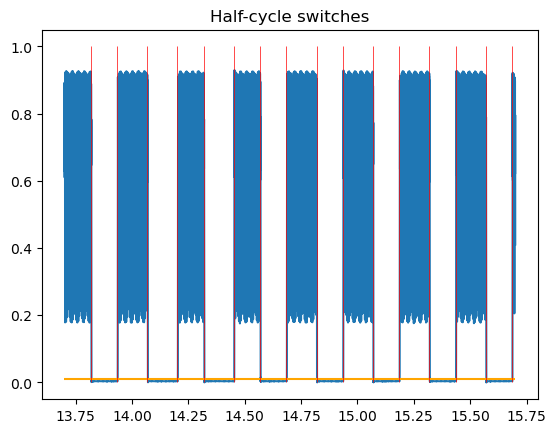

In [26]:
sidx, eidx = 35000, 45000
cut = slice(sidx, eidx)
thresh = 1e-2
offs = d[0] < thresh
ons = np.logical_not(offs)
switches = np.flatnonzero(ons[:-3] & offs[1:-2] & offs[2:-1] & offs[3:])
plt.plot(t[sidx:eidx], d[0][cut])
plt.hlines(thresh, t[sidx], t[eidx], color="orange")
switches = get_halfcycle_switches(
    t[sidx:eidx], d[0][cut], thresh=thresh, n_pre=10, n_any=3, n_post=10
)
plt.vlines(switches, 0, 1, color="r", lw=0.5)
plt.title("Half-cycle switches")

(0.0, 2.0)

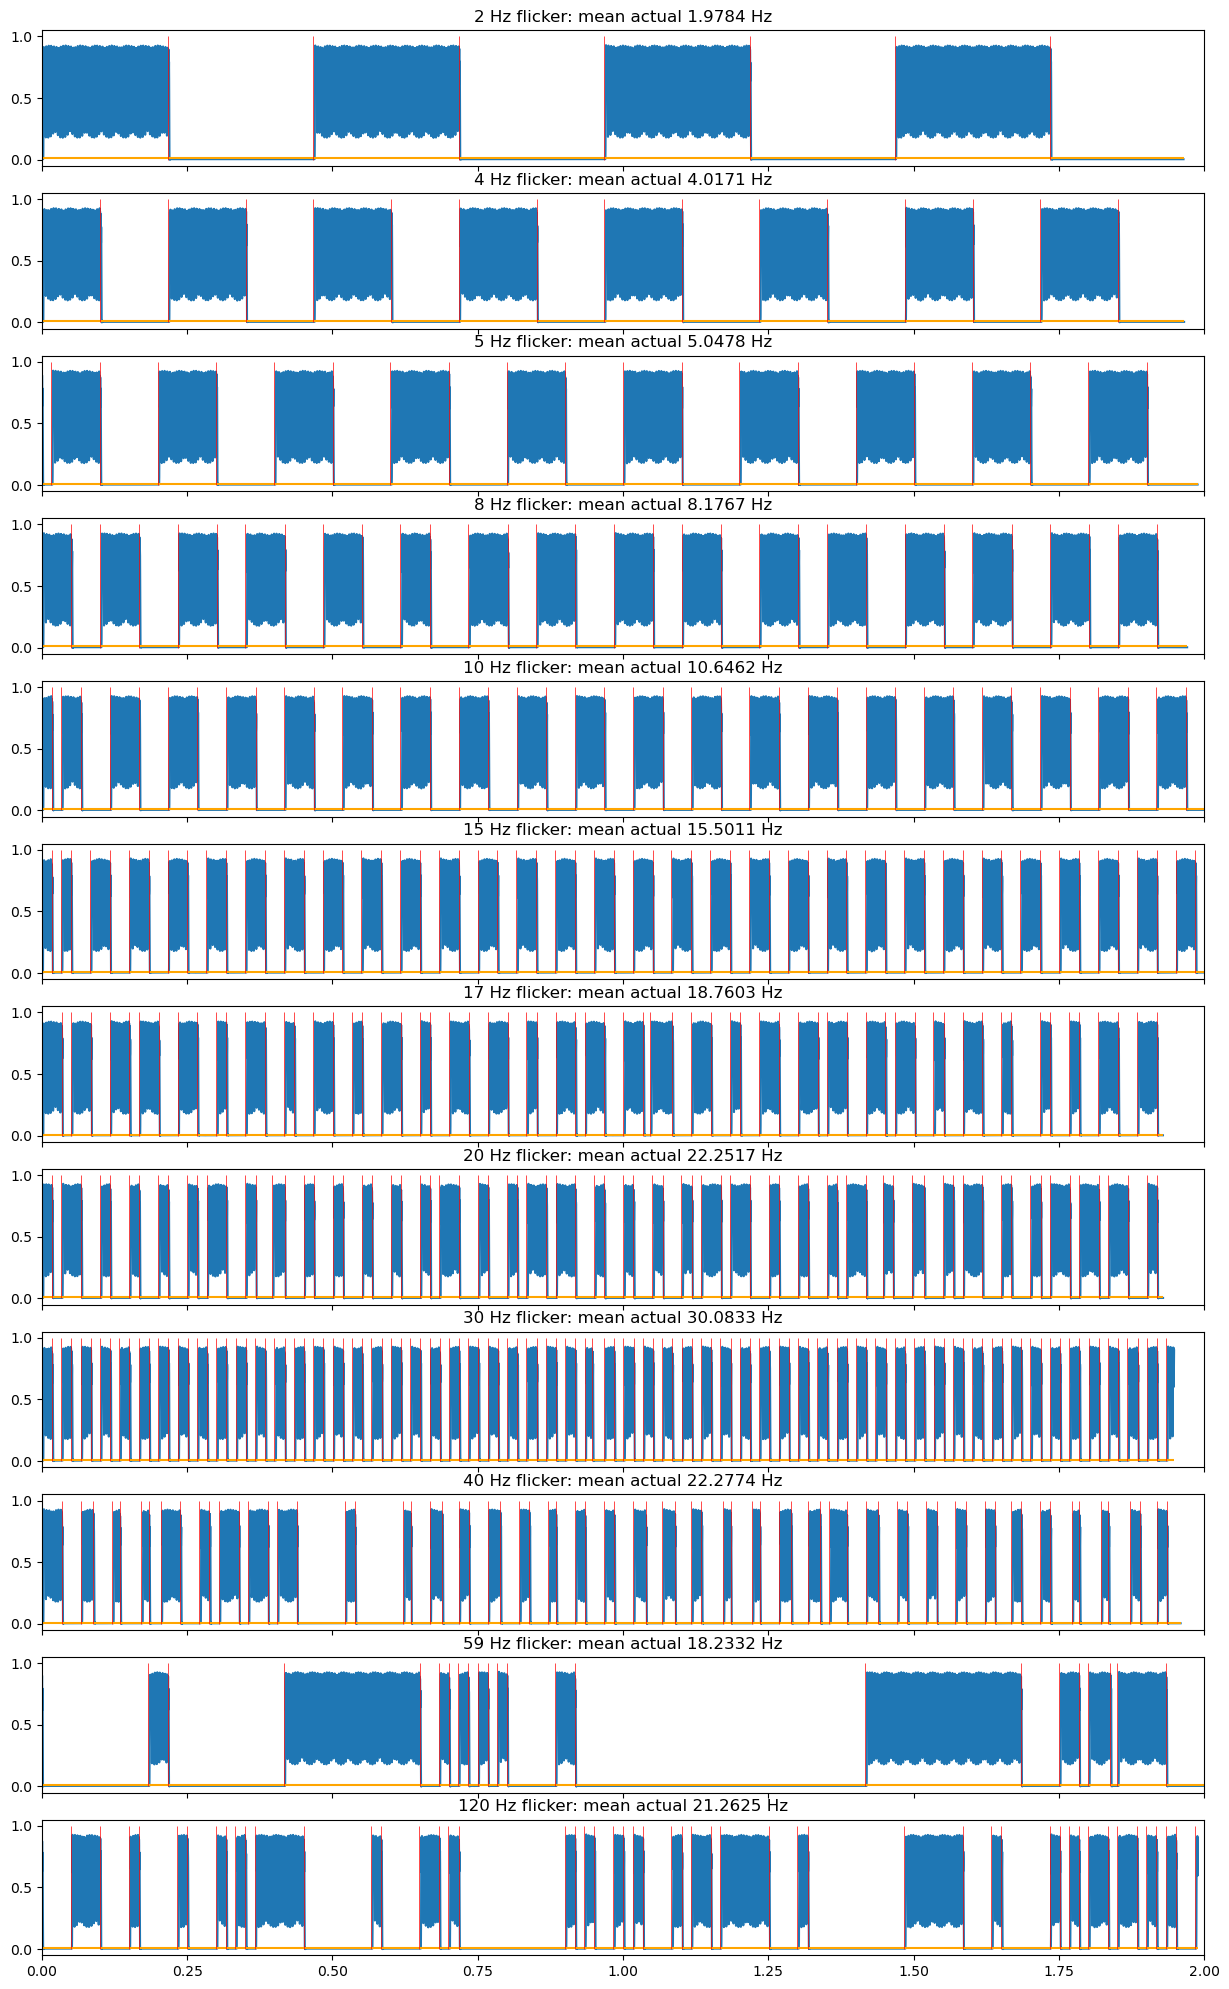

In [61]:
fig, ax = plt.subplots(12, 1, figsize=(15, 25), sharex=True)
ax = ax.flatten()
base_interval = 1 / 120
i = 0  # index for the subplot
for trial in stats.itertuples():
    if not np.isclose(trial.target_interval % base_interval, 0, rtol=0.0, atol=5e-4):
        continue
    sidx = np.searchsorted(t, trial.hardware_start)
    eidx = sidx + 10_000
    cut = slice(sidx, eidx)
    t_cut = t[cut]
    thresh = 1e-2
    offs = d[0][cut] < thresh
    ons = np.logical_not(offs)
    switches = get_halfcycle_switches(
        t_cut, d[0][cut], thresh=thresh, n_pre=10, n_any=3, n_post=10
    )
    intervals = np.diff(switches)[1:]
    inst_freq = 1 / intervals
    ax[i].plot(t_cut - switches[0], d[0][cut])
    ax[i].hlines(thresh, 0, t[eidx] - switches[0], color="orange")
    ax[i].vlines(switches - switches[0], 0, 1, color="r", lw=0.5)
    ax[i].set_title(f"{trial.target_f} Hz flicker: mean actual {np.mean(inst_freq) / 2:.4f} Hz")
    i += 1
    if (i + 1) > len(ax):
        break
ax[i - 1].set_xlim([0, 2.0])